In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import numpy as np

from astropy.cosmology import Planck18
import py21cmfast as p21c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
from dm21cm.dm_params import DMParams
from dm21cm.evolve import evolve

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [8]:
run_name = 'test2'

os.environ['DM21CM_DATA_DIR'] = '/n/holyscratch01/iaifi_lab/yitians/dm21cm/DM21cm/data/tf/zf01/data'

#===== global params =====
p21c.global_params.CLUMPING_FACTOR = 1.
p21c.global_params.Pop2_ion = 0.

return_dict = evolve(
    run_name = run_name,
    z_start = 45.,
    z_end = 5.,
    dm_params = DMParams(
        mode='decay',
        primary='phot_delta',
        m_DM=1e8, # [eV]
        lifetime=1e50, # [s]
    ),
    enable_elec = False,
    
    p21c_initial_conditions = p21c.initial_conditions(
        user_params = p21c.UserParams(
            HII_DIM = 32,
            BOX_LEN = 32 * 2, # [conformal Mpc]
            N_THREADS = 32,
        ),
        cosmo_params = p21c.CosmoParams(
            OMm = Planck18.Om0,
            OMb = Planck18.Ob0,
            POWER_INDEX = Planck18.meta['n'],
            SIGMA_8 = Planck18.meta['sigma8'],
            hlittle = Planck18.h,
        ),
        random_seed = 54321,
        write = True,
    ),
    p21c_astro_params = p21c.AstroParams(L_X = 0.), # log10 value

    clear_cache = True,
    no_injection = True,
    #tf_on_device = False,
)

np.save(f'../outputs/dm21cm-check/{run_name}_records.npy', return_dict['records'])

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/inputs.py:487: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
INFO:root:Using 21cmFAST version 0.1.dev1586+g60df221.d20231025
INFO:root:Cache dir: /n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/test2
INFO:root:TransferFunctionWrapper: Loaded photon transfer functions.
INFO:root:TransferFunctionWrapper: Skipping electron transfer functions.
INFO:root:DarkHistoryWrapper: Running DarkHistory to generate initial conditions...


Loading time: 0.000 s


  0%|          | 2/430 [00:00<00:30, 14.00it/s]

Initialization time: 0.021 s


100%|██████████| 430/430 [00:52<00:00,  8.15it/s]
INFO:root:DarkHistoryWrapper: Saved DarkHistory initial conditions.


Main loop time: 52.748 s


100%|██████████| 204/204 [01:26<00:00,  2.35it/s]

21cmFAST: 0.4184 +/- 0.0164 s
prep_next: 0.0051 +/- 0.0002 s


In [9]:
r_new = np.load(f'../outputs/dm21cm-check/test2_records.npy', allow_pickle=True).item()
r_old = np.load(f'../outputs/dm21cm-check/test_records.npy', allow_pickle=True).item()

[]

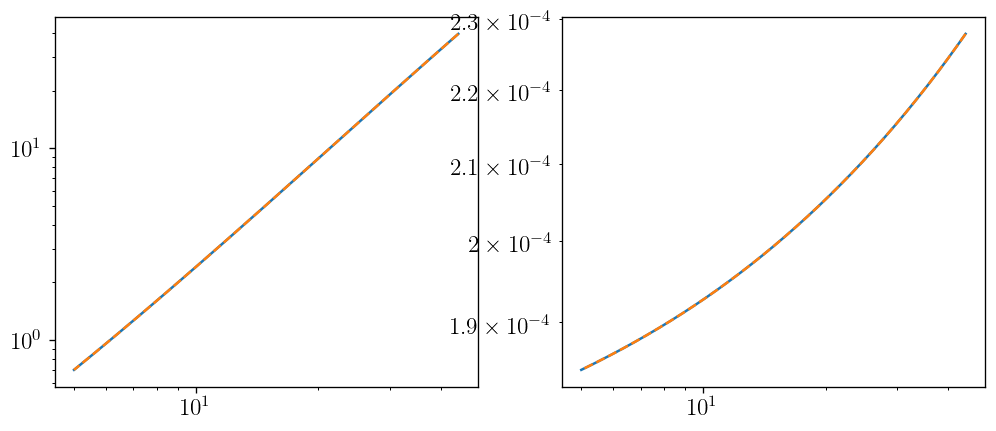

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
ax = axs[0]
ax.plot(r_new['z'], r_new['T_k'])
ax.plot(r_old['z'], r_old['T_k'], '--')
ax.loglog()

ax = axs[1]
ax.plot(r_new['z'], r_new['x_e'])
ax.plot(r_old['z'], r_old['x_e'], '--')
ax.loglog()

In [12]:
r_new['x_e']/r_old['x_e']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)